2022-01-28 14:13:25,868:INFO:tfsa data loaded: in load_data
2022-01-28 14:13:25,984:INFO:SRU-UN.TO: error in trx date (2022-01-17 00:00:00), NYSE market not open. open qty set to 0: in daily_pnl


           Ticker Type  Quantity   Price  Fees Currency
Date                                                   
2021-09-30   ARKF  Buy         6   49.61     0      USD
2021-09-30   HTGC  Buy        25   15.16     5      USD
2021-09-30    IBB  Buy         4  155.91     0      USD
2021-09-30   KBWD  Buy        20   20.57     0      USD
2021-09-30    LIT  Buy         4   80.86     0      USD


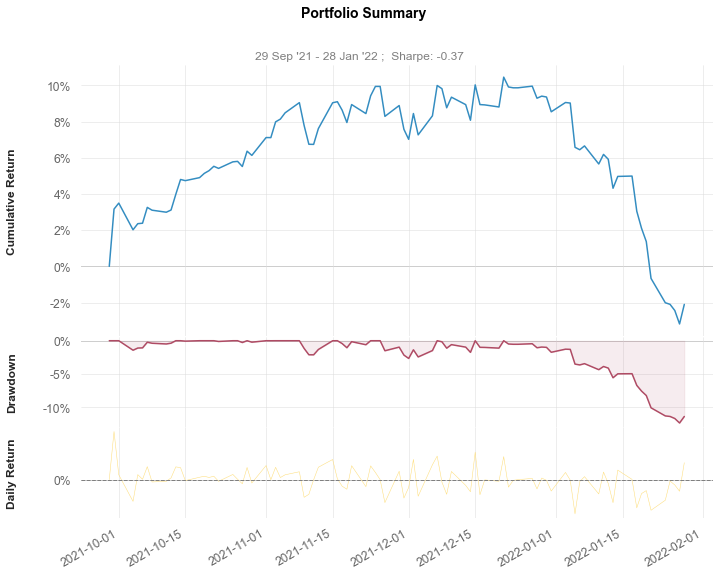

In [2]:
import portofolio as porto
import quantstats as qs

ptf = porto.Portfolio(account='tfsa', currency="CAD")

# Transactions
print(ptf.transactions.head())

# with the data that is currently loaded
pnl = ptf.pct_daily_total_pnl(start_date=ptf.start_date)
qs.plots.snapshot(pnl)

In [22]:
from datetime import datetime

# we can generate full html reports
ptf = porto.Portfolio(account='tfsa', currency="CAD")
ptf.update_data()
pnl = ptf.pct_daily_total_pnl(start_date=ptf.start_date).iloc[1:]
porto.reporting.full_html(pnl, "SPY", name=f"tfsa_{datetime.today().date()}", rf=0.)


In [26]:
new_ptf = porto.Portfolio("TEST111", currency="USD")
new_ptf.reset_transactions()
new_ptf.update_data()

print("no transactions yet")
print(new_ptf.transactions)

trx1 = porto.Transaction(date=datetime(2022, 1, 26),
            ticker="AAPL",
            type="Buy",
            quantity=10,
            price=120.,
            fees=0.,
            currency="USD")

new_ptf.add_transaction([trx1])


print("with new transaction 1")
print(new_ptf.transactions)

trx2 = porto.Transaction(date=datetime(2022, 1, 26),
            ticker="MSFT",
            type="Buy",
            quantity=10,
            price=260.,
            fees=0.,
            currency="USD")

new_ptf.add_transaction([trx2])
print("with new transaction 2")
print(new_ptf.transactions)

no transactions yet
Empty DataFrame
Columns: [Ticker, Type, Quantity, Price, Fees, Currency]
Index: []
with new transaction 1
           Ticker Type  Quantity  Price  Fees Currency
Date                                                  
2022-01-26   AAPL  Buy        10  120.0   0.0      USD
with new transaction 2
           Ticker Type  Quantity  Price  Fees Currency
Date                                                  
2022-01-26   AAPL  Buy        10  120.0   0.0      USD
2022-01-26   MSFT  Buy        10  260.0   0.0      USD


In [11]:
aapl = porto.Position(ticker='AAPL', currency='USD')

print(aapl.daily_pnl())

Empty DataFrame
Columns: [unrealized, realized, dividend, total]
Index: []
